# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

- Импортируем библиотеки pandas, matplotlib и поместим датафрейм в переменную data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

- Выведем первые строчки датафрейма на экран.

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


- Выведем общую информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

После изучения выведенного датафрема сразу видно, что в некоторых столбцах необходито изменить тип данных. Например в столбце `first_day_exposition`

Также необходимо переименовать столбец `cityCenters_nearest`

- Построим гистограммы столбцов датафрейма.

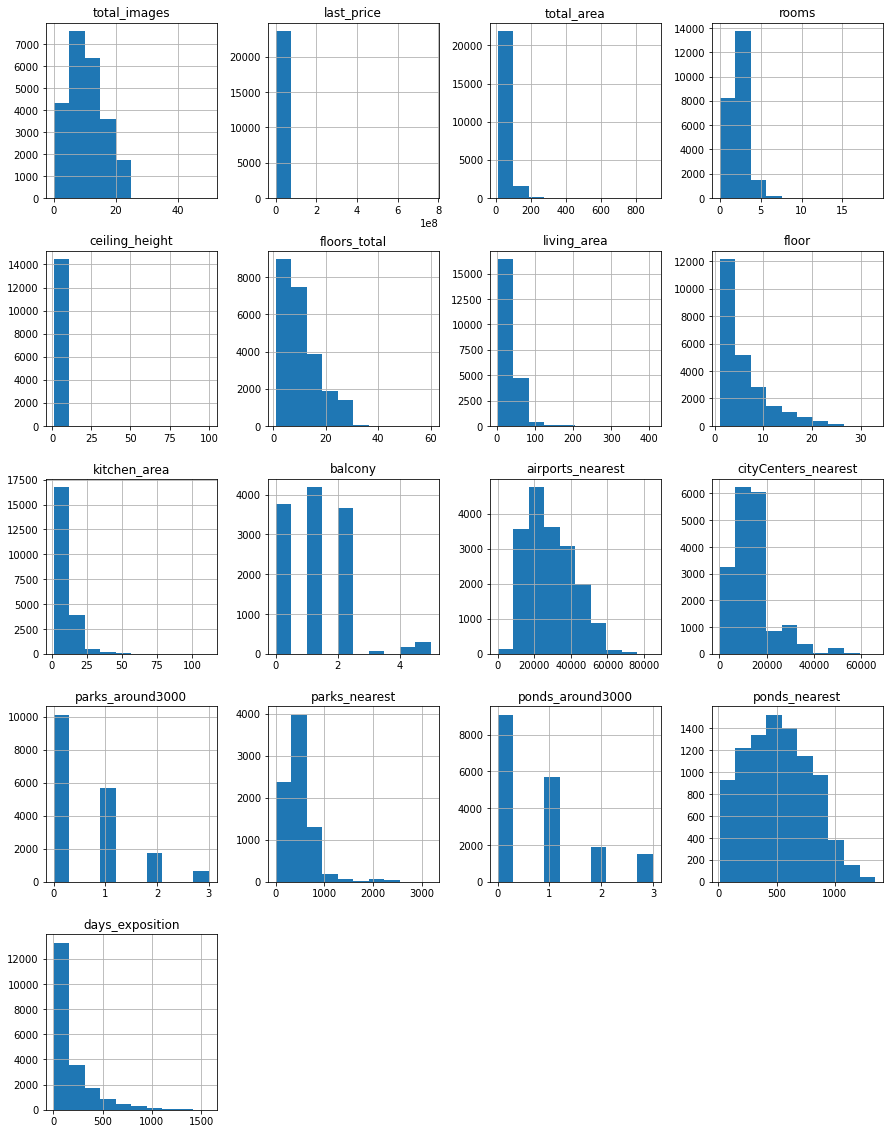

In [5]:
data.hist(figsize=(15, 20))
plt.show()

На большинстве гистограмм прослеживается распределение Пуассона.

Первое, что бросается в глаза - гистограммы по столбцам `last_price` и `total_area`. Вероятно в столбцах присутствуют сильно выбивающиеся значения. Схожая ситуация и с некоторыми другими столбцами.



### Предобработка данных

In [6]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

#### Найдём и изучим пропущенные значения в столбцах

- Выведем количество пропущенных значений для каждого столбца.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Разберём пропуски:
- `is_apartment` - пропуски в столбце идининтикации апартаментов. Слишком много пропусков, анализировать данные по столбцу нельзя. Но, на мой взгляд, все пропуски можно заменить значением по умолчанию, например, `False`. Вероятно, возникли из-за человеческого фактора.
- `balcony` - пропуски с столбце количества балконов. Можно все заменить на 0. Вероятно, возникли из-за человеческого фактора.


- `days_exposition` - вероятно, самый интересный столбец. В нём пропуски полностью случайные. Однако, за до 200 дней было размещено 20518 из 23699 и корреляция в данных значениях слабая. Это позволяет нам использовать медианное значение.
- `ceiling_height` - пропуски в столбце высоты потолков можно заменить медианным значеним. Вероятно, возникли из-за человеческого фактора.


- `living_area` - пропуски в столбце жилой площади можно заменить отношением общей прощади к среднему коээфециенту соотношения общей прощади к жилой. Вероятно, возникли из-за человеческого фактора.
- `kitchen_area` - пропуски в столбце площади кухни. Можно заменить, посчитав среднее отношение общей площади к лощади кухни (также, как со столбцом living_area). Вероятно, возникли из-за человеческого фактора.

!!!Однако, данные могли быть не указаны, поскольку нет кухни.


- `parks_nearest`, `ponds_nearest` - расстояние до ближайшего парка и водоема имеют корреляцию в пропусках. Вероятно, возникли из-за человеческого фактора. Если для объявления указаны значения в столбцах `parks_around3000` и `ponds_around3000`, их можно заменить на медианное значение по количеству ближайших парков.
- `parks_nearest`, `ponds_nearest` - расстояние до ближайшего парка и водоема имеют корреляцию в пропусках. Вероятно, возникли из-за человеческого фактора. Если для объявления указаны значения в столбцах `parks_around3000` и `ponds_around3000`, расстояние можно заменить на среднее значение по количеству ближайших парков.


Эти столбцы оставим неизменными:
- `floors_total` - пропуски в столбце количества этажей. Вероятно, возникли из-за человеческого фактора.
- `locality_name` - пропуски в обозначении населенного пункта. Вероятно, возникли из-за человеческого фактора.
- `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000` - пропуски в столбцах плижашего аэропорта, расстояния до центра, количестве парков и водоемов на расстояниии 3000м. Пропуски имеют кореляцию и, вероятно, произошли из-за ошибки при записи данных с карт. Пока оставим без изменений.

- Заменим значения в столбце `is_apartment`.

При необходимости удалить столбец можно испольховать метод .drop(), предварительно удалив 50 строк со значением True

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

print(f"Осталось пропусков: {data['is_apartment'].isna().sum()}")

Осталось пропусков: 0


- Заменим значения в столбце `balcony`.

In [9]:
data['balcony'] = data['balcony'].fillna(0)

print(f"Осталось пропусков: {data['balcony'].isna().sum()}")

Осталось пропусков: 0


- Считаем, что пропуски в столбце `days_exposition` возникли из-за того, что квартиры еще не проданы. Эти пропуски заполнять или удалять не будем.



In [10]:
# data.loc[(data['days_exposition'].isna(), 'days_exposition')] = data['days_exposition'].median()

# print(f"Осталось пропусков: {data['days_exposition'].isna().sum()}")

- Заменим значения в столбце `ceiling_height`.

In [11]:
data.loc[(data['ceiling_height'].isna(), 'ceiling_height')] = data['ceiling_height'].median()

print(f"Осталось пропусков: {data['ceiling_height'].isna().sum()}")

Осталось пропусков: 0


- Заменим значения в столбце `living_area`.

In [12]:
# определим коэффециент для вычисления, путём определения соотношения медиан жилой площади к общей
ratio_living_area = data['living_area'].median() / data['total_area'].median()
# с помощью коэффециента заполнем пустые значния
data.loc[(data['living_area'].isna(), 'living_area')] = data['total_area'] * ratio_living_area


print(f"Осталось пропусков: {data['living_area'].isna().sum()}")

Осталось пропусков: 0


- Заменим значения в столбце `kitchen_area`.

In [13]:
# определим коэффециент для вычисления, путём определения соотношения медиан жилой площади к площади кухни
ratio_kitchen_area = data['kitchen_area'].median() / data['total_area'].median()
# с помощью коэффециента заполнем пустые значния
data.loc[(data['kitchen_area'].isna(), 'kitchen_area')] = data['total_area'] * ratio_kitchen_area

print(f"Осталось пропусков: {data['kitchen_area'].isna().sum()}")

Осталось пропусков: 0


- Пропуски в столбцах с картографическими данными трогать не будем, так как мы не можем восстановить их с достаточной точностью. Лучше оставим их как есть.

In [14]:
# for park in data['parks_around3000'].unique():
#     try:
#         data.loc[(data['parks_around3000'] == park) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
#         data.loc[(data['parks_around3000'] == park), 'parks_nearest'].median()
#     except:
#         continue


# print(f"Осталось пропусков: {data['parks_nearest'].isna().sum()}")

~Да, заменить все значения не получилось, но вместо 15620 становится 5518 пропусков.~

~Оставшиеся пропуски в столбках могли возникнуть по технической ошибке при переносе. Некоторые из оставшихся всё также могли возникнуть из-за человеческого фактора.~

~- Аналогично полупим со столбцом `ponds_nearest`.~

~В данном столбце интересен следующий факт. Ни для одного объявления рядом с которым нет водоёмов не указан ближайший водоём. Однако, если вывести сводные таблицы по столбцам для парков и водоёмов, то видно, что значения коррелируют. Выдвинем предположение, что водоёмы могут располагаться в парках.~

~Для объявлений, где рядом нет водоёмов, используем медиану для объявлений с нулём парков рядом.~

In [15]:
# сводная таблица по паркам
# data.pivot_table(index='parks_around3000', values='parks_nearest')

In [16]:
# сводная таблица по водоёмам до обработки
# data.pivot_table(index='ponds_around3000', values='ponds_nearest')

In [17]:
# data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
# data.loc[(data['parks_around3000'] == 0), 'parks_nearest'].median()
# 
# 
# for pond in data['ponds_around3000'].unique():
#     try:
#         data.loc[(data['ponds_around3000'] == pond) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
#         data.loc[(data['ponds_around3000'] == pond), 'ponds_nearest'].median()
#     except:
#         continue

# print(f"Осталось пропусков: {data['ponds_nearest'].isna().sum()}")

Значения столбка `floors_total` можно заполнить путем вычисления медианы для зданий, которые выше текущего этажа в объявлении. Однако, из-за малого процента пропусов в столбце, значения проще отбросить, чем считать.

Также поступим со столбцом `locality_name`.

In [18]:
data = data.dropna(subset=['floors_total', 'locality_name'])

Оставшиеся пропуски неслучайные, пока их трогать не будем.

#### Рассмотрим типы данных в каждом столбце

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

- столбец `first_day_exposition` приведём к виду datetime для использования в математических операциях.


- стобцы `floors_total`, `last_price`, `balcony`,  `days_exposition` можно привести к типу integer для приведения к общему виду и упрощения математических операций. 

In [20]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [21]:
columns = ['floors_total', 'last_price', 'balcony', 'days_exposition']

for i in columns:
    data[i] = data[i].astype('int', errors='ignore')

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты

Выведем уникальные значения столбца `locality_name`

In [22]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Изучив данные, видим 4 типа основных неявных дубликатов:

- буквы ё и е чередуются
- поселок городского типа и городской поселок
- поселок при железнодорожной станции и поселок станции
- садоводческое некоммерческое товарищество и садовое товарищество

In [23]:
# создадим словарь для замены ошибочных переменных
# заменим в 2 этапа
to_replace_first = {
    'посёлок': 'поселок'
}
data['locality_name'] = data['locality_name'].replace(to_replace_first, regex=True)

to_replace = {    
    'поселок станции': 'поселок при железнодорожной станции',
    'городской поселок': 'поселок городского типа',
    'садовое товарищество': 'садоводческое некоммерческое товарищество',
}
data['locality_name'] = data['locality_name'].replace(to_replace, regex=True)

Вывод:
- в данных остались дубликаты, однако, они требуют ручной обработки и знания географических объектов. На изучение крупных населенных пунктов эти дубликаты не должны повлиять.

Пример:
- `городской посёлок Павлово` и `посёлок городского типа Павлово` это один населенный пункт, а `село Павлово` совсем другой.

#### Найдем и устраним редкие и выбивающиеся значения

Изучим столбцы в которых могут встретиться выбивающиеся значения:

- столбец `ceiling_height` обладает уникальным форматом значений, рассмотрим его отдельно. В нем не может присутствовать такого разброса.

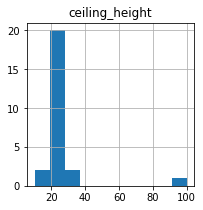

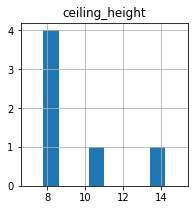

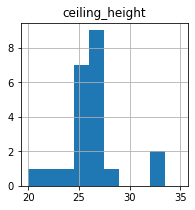

In [24]:
data.hist('ceiling_height', bins=10, range=(10,100), figsize=(3, 3))
plt.show()
data.hist('ceiling_height', bins=10, range=(7,15), figsize=(3, 3))
plt.show()
data.hist('ceiling_height', bins=10, range=(20,35), figsize=(3, 3))
plt.show()

По гистораммам можно сделать несколько выводов:

- 100 метров. Одно выбивающееся значение, где высота потолка равна 100 метром, эту строку лучше удалить.
- диапазоны [1.0, 1.75] и [8.0, 14.0]. Возможные причины: человеческий фактор. Данные лучше удалить, поскольку их количество не значительно.
- диапазон [20.0, 35.0]. Возможные причины: человеческий фактор. Вероятно, при записи данных дробная часть была отделена в неположенном месте, сместим ее влево.
- диапазоны (3.0, 8) и (1.75, 2.4)- выбивающиеся значения, которые лучше удалить.

In [25]:
# изменим значения диапазона [20, 35]
data.loc[(data['ceiling_height'] >= 20), 'ceiling_height'] /= 10

# удалим значения, которые нельзя изменить
data = data[((data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 3))
            | ((data['ceiling_height'] >= 17.5) & (data['ceiling_height'] < 70))]

len(data)

21984

Посчитаем значения в следующих столбцах и удалим сткроки, если значений малое количество.

- is_apartment
- studio
- open_plan

In [26]:
print(len(data.loc[data['is_apartment'] == True]),
      len(data.loc[data['studio'] == True]),
      len(data.loc[data['open_plan'] == True]))

31 139 65


In [27]:
data = data[(data['is_apartment'] != True) & (data['studio'] != True) & (data['open_plan'] != True)]

- столбцы `last_price` и `total_area` должны коррелировать, изучим их подробнее.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

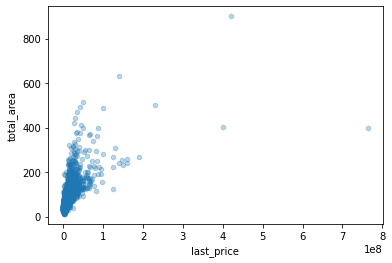

In [28]:
data.plot.scatter(
    x='last_price',
    #xlim=(200000, 20000000),
    y='total_area',
    alpha=0.3,
)

<AxesSubplot:>

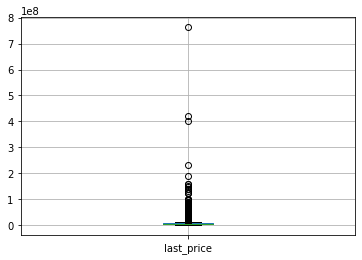

In [29]:
data.boxplot('last_price')

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

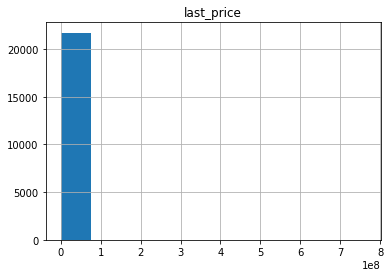

In [30]:
data.hist('last_price')

Видим несколько явно выбивающихся значений, которые должно быть на порядок ниже. К тому же видим концентрацию значений для объявлений с суммой до 15000000 (300000 - минимальная цена на квартиру). Часть крупных значений оставим для будущего анализа. Остальные значения отбросим, поскольку в них могут быть ошибки в количесве нулей.

Дополнительно проверим слишком малые значения.

In [31]:
data.loc[(data['last_price'] == data['last_price'].max()) | (data['last_price'] < 400000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
12971,19,763000000,400.0,2017-09-30,7,2.65,10,250.0,10,False,False,False,70.0,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


Видим 2 строки, которые вряд ли должны находиться в датафрейме. Вероятно, у первого значения не хватает двух нулей, а у второго один лишний. Однако, проще данные 2 строки удалить.

In [32]:
data = data[(data['last_price'] != 12190) & (data['last_price'] <= 15000000)]
len(data)

20959

Аналогично поступим со столбцом `total_area`, `kitchen_area` и `living_area`

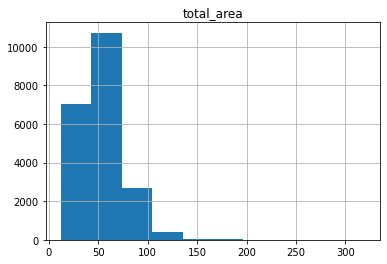

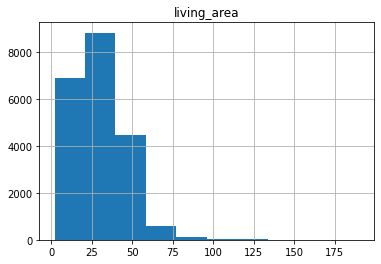

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

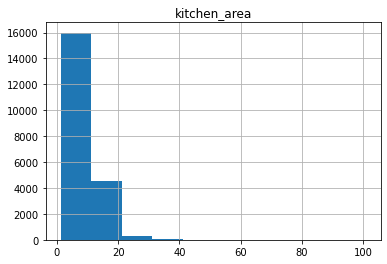

In [33]:
data.hist('total_area')
plt.show()
data.hist('living_area')
plt.show()
data.hist('kitchen_area')

In [34]:
data = data[(data['total_area'] < 130)]
data = data[(data['living_area'] < 80) & (data['living_area'] >= 15)]
data = data[(data['kitchen_area'] <= 25) & (data['kitchen_area'] >= 5)]
len(data)

19728

Проверим столбец `rooms`

In [35]:
data['rooms'].value_counts()

2    7201
1    6962
3    4827
4     666
5      68
6       4
Name: rooms, dtype: int64

- В одном из объявлений до начала обработки было 19 комнат - очень специфичный показатель, однако, всего один и для общей статистики вносить лишь смуту. Оставим объявления в которых менее 5 комнат.

- Целых 193 объявления с 0 комнат. Посмотрим, что можно сделать с ними.

In [36]:
data = data.loc[(data['rooms'] != 0) & (data['rooms'] < 5)]
len(data)

19656

Можно решить проблему следующим способом:

- для квартир площадью до 40 квадратным метров можно предположить, что комнат должо быть одна;
- для диапазона [40, 60), что комнат 2;
- для диапазона [60, 09), что комнат 3.

Однако, выбивающихся значений не так много и значения можно удалить, чтобы не вносить других ошибочных значений.

Рассмотрим столбец `days_exposition` и удалим выбивающиеся значения

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

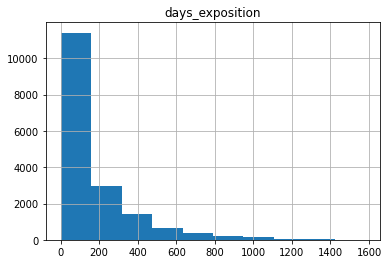

In [37]:
data.hist('days_exposition')

In [38]:
data = data.loc[(data['days_exposition'] < 1000)]
len(data)

17062

Удалим выбивающиеся значения в столбце `floors_total`, параллельно усредним значения столбца `floor`

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

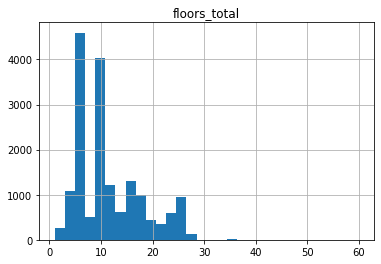

In [39]:
data.hist('floors_total', bins=30)

In [40]:
data = data.loc[(data['floors_total'] < 30)]
len(data)

17044

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

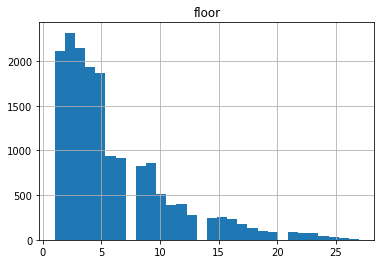

In [41]:
data.hist('floor', bins=30)

Столбец `floor` имеет приемлемые значения, изменять не будем.

Вывод:

- некоторые данные, которые были заменены, могли бы быть удалены за счет незначительности их количества, однако, так можно сохранить уровень средних значений;
- для большинства столбцов получилось заменить значения на релевантные;
- для оставшихся столбцов с расстоянием, парками и водоемами оставим незаполненные значения, поскольку они расположены в одинаковых строках и их заполнение приведет к деактуализации данных. А значения из других столбцов данных строк нам еще пригодятся

### Посчитаем и добавим в таблицу новые столбцы

цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «‎первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Добавим столбец:
- цена одного квадратного метра.

In [42]:
data['one_meter_price'] = data['last_price'] / data['total_area'] 

Добавим столбцы:
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления.

In [43]:
data['week_day_of_exposition'] = data['first_day_exposition'].dt.weekday
data['month_of_exposition'] = data['first_day_exposition'].dt.month
data['year_of_exposition'] = data['first_day_exposition'].dt.year

Добавим столбец:
- тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [44]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'


data['floor_type'] = data.apply(floor_type, axis=1)

Добавим столбец:
- расстояние до центра города в километрах (переведем из м в км и округлим до целых значений).

In [45]:
data['distance_city_center_in_kilometers'] = data['city_centers_nearest'] / 1000 // 1

In [46]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,week_day_of_exposition,month_of_exposition,year_of_exposition,floor_type,distance_city_center_in_kilometers
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,18.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,13.0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,13.0
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.000000,0,8,2018,другой,51.0
12,10,3890000,54.00,2016-06-30,2,2.65,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,72037.037037,3,6,2016,последний,NaN
13,20,3550000,42.80,2017-07-01,2,2.56,5,27.00,5,False,False,False,5.20,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943.925234,5,7,2017,последний,33.0
14,1,4400000,36.00,2016-06-23,1,2.65,6,17.00,1,False,False,False,8.00,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222.222222,3,6,2016,первый,30.0
15,16,4650000,39.00,2017-11-18,1,2.65,14,20.50,5,False,False,False,7.60,1,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,119230.769231,5,11,2017,другой,14.0


### Проведем исследовательский анализ данных

#### Исследуем столбцы

Исследуем стобец общей площади `total_area`.

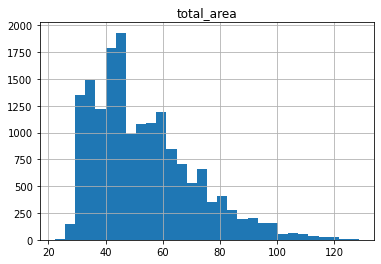

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

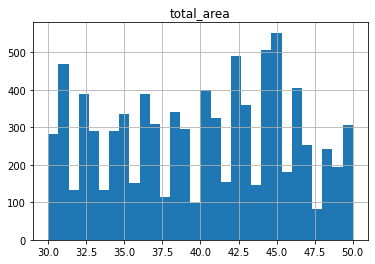

In [47]:
data.hist('total_area', bins=30)
plt.show()
data.hist('total_area', bins=30, range=(30, 50))

Стобец имеет распределение Пуассона, со смещенным ближе к 0 медианным значением.

- неявно наблюдаются пиковые значения около 45, 60, 70, 90 квадратных метров.

Исследуем стобец жилой площади `living_area`.

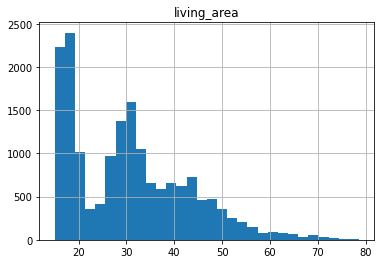

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

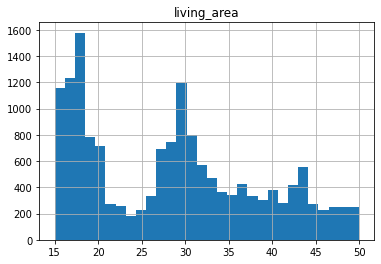

In [48]:
data.hist('living_area', bins=30)
plt.show()
data.hist('living_area', bins=30, range=(15, 50))

Стобец имеет распределение Пуассона, однако на данной гистограмме пиковые значения наблюдаются явно.

Они могли возникнуть из-за стандартов помещений при строительстве зданий разной площади или этажности. Схожая динамика наблюдается на гистограмме этажности.

Исследуем стобец площади кухни `kitchen_area`.

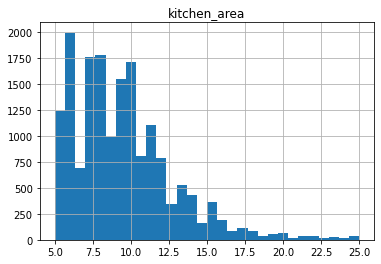

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

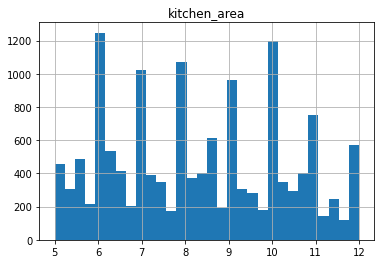

In [49]:
data.hist('kitchen_area', bins=30)
plt.show()
data.hist('kitchen_area', bins=30, range=(5, 12))

Общий вид имеет распределение Пуассона, однако наблюдаются пики на круглых значениях. Данные пиковые значения не критичны.

Исследуем стобец последней стоимости `last_price`.

In [50]:
data['last_price'] /= 1000000

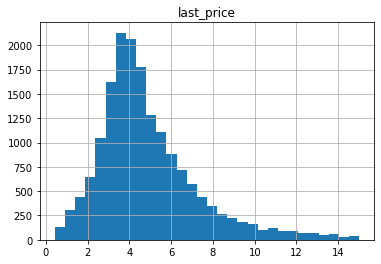

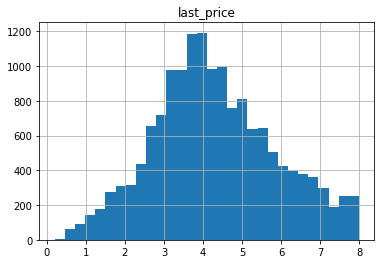

In [51]:
data.hist('last_price', bins=30)
plt.show()
data.hist('last_price', bins=30, range=(0.2, 8))
plt.show()

Гистограмма имеет нормальное распределение с небольшим смещением.

Исследуем стобец количества комнат `rooms`

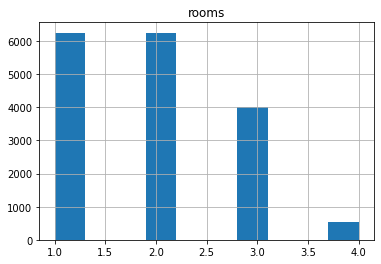

In [52]:
data.hist('rooms', bins=10)
plt.show()

В показателях количества комнат нет никаких лишних значений, а распределение похоже на нормальное с пиком две комнаты.

Исследуем стобец высоты потолков `ceiling_height`

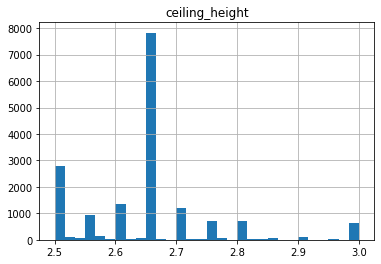

In [53]:
data.hist('ceiling_height', bins=30)
plt.show()

На гистограмме видно малое количество нестандартных значений. Однако, они лежат в диапаззоне стандартных значений. Возможны ошибки при измерении, но погрешность незначительная.


Исследуем стобцы:
- этаж квартиры `floor`;
- тип этажа квартиры («первый», «последний», «другой») `floor_type`;
- общее количество этажей в доме `floors_total`.

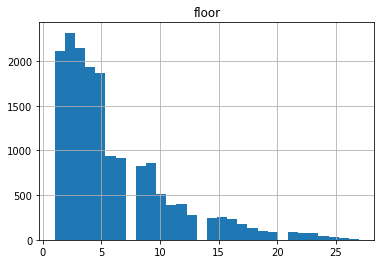

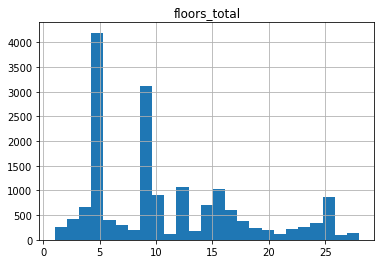

floor_type
другой       12637
последний     2295
первый        2112
dtype: int64

In [54]:
data.hist('floor', bins=30)
plt.show()
data.hist('floors_total', bins=25)
plt.show()
data.value_counts('floor_type')

В гистограмме общего количества этажей явно выбиваются стандартные значения 5, 9, 12 и 16. Из этого и следует график этажей, где большая часть квартир ниже 5 этажа. Далее распределение Пуассона, поскольку во всех домах есть первый этаж, а вот 25 уже далеко не во всех.

По таблице типов этажей видно, что значения 'первый' и 'послдений' присутствуют в равыных проворциях.

Исследуем стобцы:
- расстояние до центра города в метрах `city_centers_nearest`;
- расстояние до ближайшего аэропорта `airports_nearest`;
- расстояние до ближайшего парка `parks_nearest`.

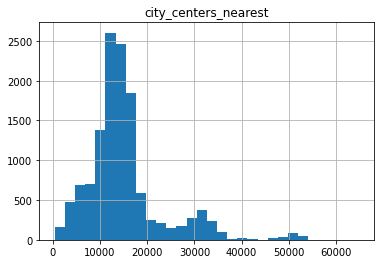

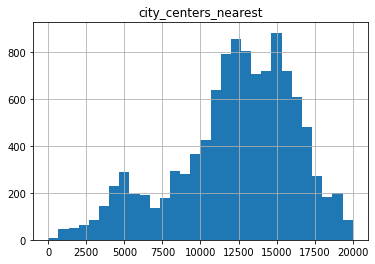

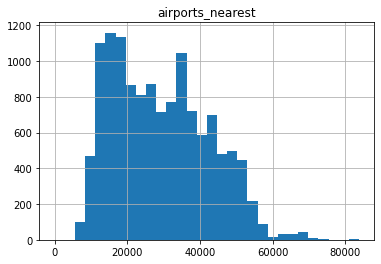

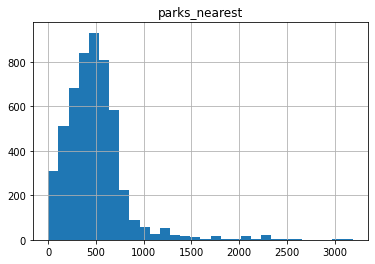

In [55]:
data.hist('city_centers_nearest', bins=30)
plt.show()
data.hist('city_centers_nearest', bins=30, range=(0,20000))
plt.show()
data.hist('airports_nearest', bins=30)
plt.show()
data.hist('parks_nearest', bins=30)
plt.show()

Столбец `city_centers_nearest` имеет нормальное распределение с некоторыми пиковыми значениями (вероятно, крупные населенные пункты). Такая же картина со столбцом `airports_nearest`, но пики на нём менее явные.

В столбце `parks_nearest` для значений с нулем парков в радиусе 3000 метров мы указали медианное значение по данной категории, из-за этого имеем выбивающееся значение, однако без этого заполнение у нас было бы слишком много отсутствующих значений.

Исследуем стобец количества дней публикации в зависимости от даты публикации объявления `days_exposition`.

!!!Для следующих данных не вижу выгоды в построении гистограмм. Эффективнее отсортированные сводные таблицы!!!

In [56]:
(data
 .pivot_table(index='week_day_of_exposition', values='days_exposition', aggfunc='count')
 .sort_values(by='days_exposition')
)

,days_exposition
week_day_of_exposition,
6,1246
5,1413
0,2521
2,2835
4,2971
1,2991
3,3067


In [57]:
(data
 .pivot_table(index='week_day_of_exposition', values='days_exposition', aggfunc='median')
 .sort_values(by='days_exposition')
)

,days_exposition
week_day_of_exposition,
6,78.0
4,89.0
1,90.0
3,90.0
5,90.0
0,92.0
2,92.0


In [58]:
(data
 .pivot_table(index='month_of_exposition', values='days_exposition', aggfunc='count')
 .sort_values(by='days_exposition')
)

,days_exposition
month_of_exposition,
5,929
1,1071
12,1211
4,1272
7,1298
8,1359
6,1416
9,1518
10,1625


In [59]:
(data
 .pivot_table(index='month_of_exposition', values='days_exposition', aggfunc='median')
 .sort_values(by='days_exposition')
)

,days_exposition
month_of_exposition,
11,73.0
8,79.0
2,81.5
1,82.0
12,85.0
9,85.5
10,88.0
7,90.0
3,96.0


Зависимость от дня недели публикации:

- видим, интересую закономерность, что день недели не так важен при продаже "обычной" квартиры, однако немного влияет при продаже слабо выбивающихся значений, которые мы оставили. В среднем, такие объявления, сделанные в восресенье, могут висеть на небольшое количество дней меньше, чемо бъявления сделанные в среду.

Зависимость от месяца публикации:

- сразу видно, что летом или в декабре квартиру лучше не выставлять, лишь потратите время. А вот осень хорошо подходит для публицкации.

!!!Для этих данных не вижу выгоды в построении гистограмм. Эффективнее отсортированные сводные таблицы!!!



Вывод:
- общая площадь, жилая площадь и площадь кухни коррелируют. Имеются пиковые значения, соответствующие стандартам строительства;
- имеем нормальное распределение цены;
- стандартными являются одно- двух- или трехкомнатные квартиры;
- первые и последние этажи представлены в равных пропорциях, что свидетельствует о релевантности данных;
- пиковые значения в столбце расстояния до центра должны соответсвовать населенным пунктам на удалении от города;
- обычное объявление находилось на площадке 95 дней, а продавалось быстрее, если было выложено осенью.

#### Исследуем, как быстро продавались квартиры

Изучим, как быстро продавались квартиры (столбец `days_exposition`). 

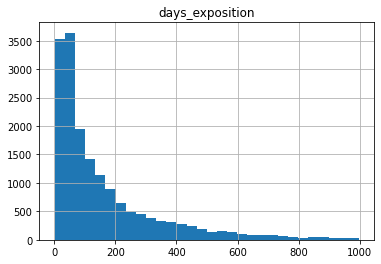

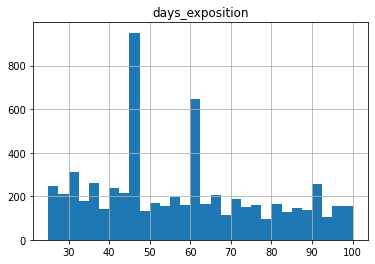

In [60]:
data.hist('days_exposition', bins=30)
plt.show()
data.hist('days_exposition', bins=30, range=(25,100))
plt.show()

In [61]:
print(f"Медианное время продажи {data['days_exposition'].median()}")
print(f"Среднее время продажи {data['days_exposition'].mean()}")

Медианное время продажи 90.00000000000001
Среднее время продажи 161.2632011264961


Можно считать быстрой продажу менее 60 дней (2 месяца), а долгую более 300 дней.

Для удобного определения медианных и средних значений по дням, можно создать столбец по типу скорости продажи:

- [0, 60] дней - быстрая продажа;
- (60, 300) дней - обычная продажа;
- 300+ дней - долгая продажа.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Рассмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта? Изучим зависимость цены от указанных ниже параметров.
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количество комнат;
 - типа этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год);


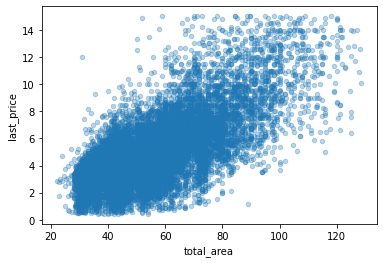

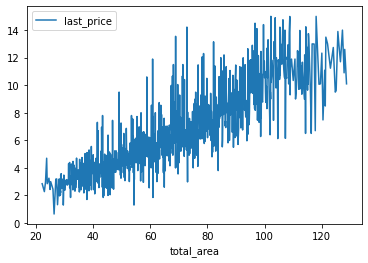

0.7206335339853248

In [62]:
(data
 .plot.scatter(x='total_area', y='last_price', alpha=0.3)
)
plt.show()

(data
 .pivot_table(index='total_area', values='last_price')
 .plot()
)
plt.show()

data['last_price'].corr(data['total_area'])

Чем больше общая площадь, тем больше разрос, однако в общая картина очевидна. Положительный коэффециент Пирсона подтверждает прямую зависимость цены от общей площади.

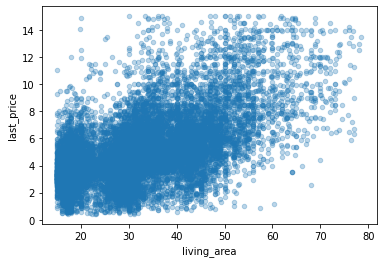

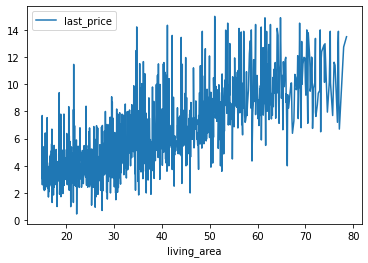

0.5943844421734479

In [63]:
(data
 .plot.scatter(x='living_area', y='last_price', alpha=0.3)
)
plt.show()

(data
 .pivot_table(index='living_area', values='last_price')
 .plot()
)
plt.show()

data['last_price'].corr(data['living_area'])

Положительный коэффециент Пирсона подтверждает прямую зависимость цены от жилой площади.

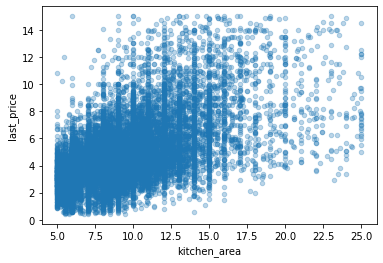

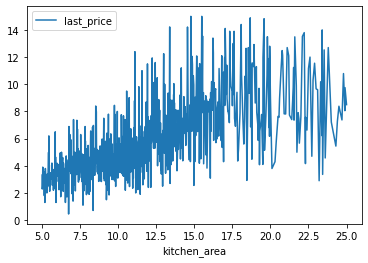

0.5543846193205042

In [64]:
(data
 .plot.scatter(x='kitchen_area', y='last_price', alpha=0.3)
)
plt.show()

(data
 .pivot_table(index='kitchen_area', values='last_price')
 .plot()
)
plt.show()

data['last_price'].corr(data['kitchen_area'])

Положительный коэффециент Пирсона подтверждает прямую зависимость цены от площади кухни.

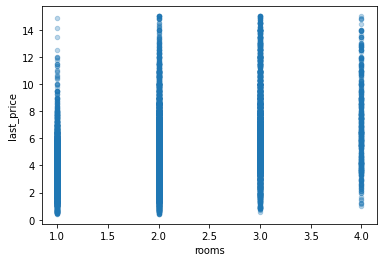

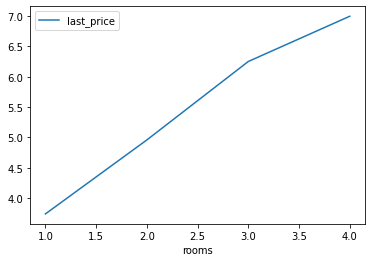

Коэффециент Пирсона 0.4314789453049384


,living_area
rooms,
1,18.566848
2,31.259479
3,44.779030
4,54.781730


In [65]:
(data
 .plot.scatter(x='rooms', y='last_price', alpha=0.3)
)
plt.show()

(data
 .pivot_table(index='rooms', values='last_price')
 .plot()
)
plt.show()

print(f"Коэффециент Пирсона {data['last_price'].corr(data['rooms'])}")
(data
 .pivot_table(index='rooms', values='living_area')
)

Положительный коэффециент Пирсона подтверждает прямую зависимость цены от количества комнат. Однако, коэффециент меньше, поскольку при большем количестве комнат, площадь одной комнаты меньше.

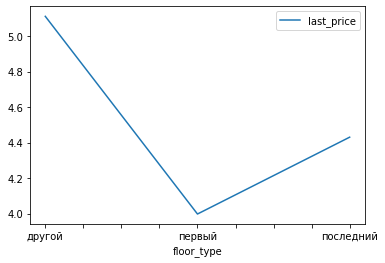

In [66]:
(data
 .pivot_table(index='floor_type', values='last_price')
 .plot()
)
plt.show()

Очевидно, что хуже всего продаются квартиры на первом этаже. На последнем ситуация получше, но до других им далеко.

!!!Важное замечание: в данных довольно много пятиэтажек, в которые обычно нет лифта. Стоит подробнее изучить последние этажи, проведя сортировку по количеству этажей в доме. В последнем этаже достаточно преимуществ, если в доме есть лифт и он хорошего качества.!!!

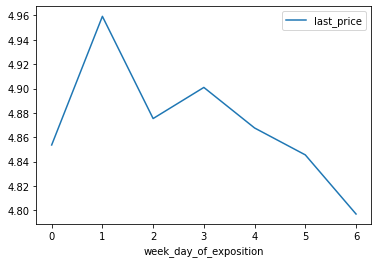

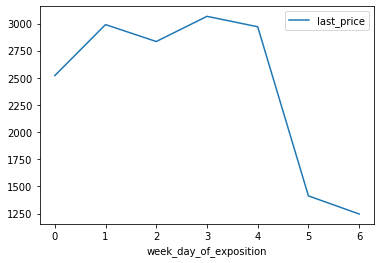

In [67]:
(data
 .pivot_table(index='week_day_of_exposition', values='last_price')
 .plot()
)
plt.show()

(data
 .pivot_table(index='week_day_of_exposition', values='last_price', aggfunc='count')
 .plot()
)
plt.show()

В течении рабочей недели выставляют больше всего объявлений, однако, самые дорогие из них лишь в начале.

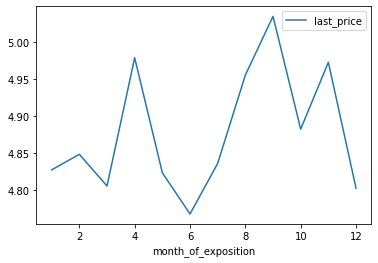

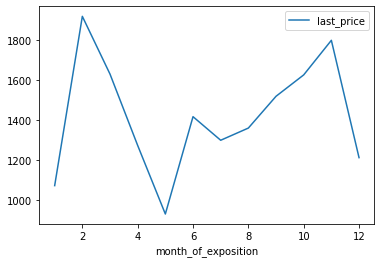

In [68]:
(data
 .pivot_table(index='month_of_exposition', values='last_price')
 .plot()
)
plt.show()

(data
 .pivot_table(index='month_of_exposition', values='last_price', aggfunc='count')
 .plot()
)
plt.show()

С месяцами очень интересная картина, больше всего объявлений выставляют весной, однако, высокая сердняя цена осенью стабильнее. Также бросается в глаза просадка по обоим показателям летом.

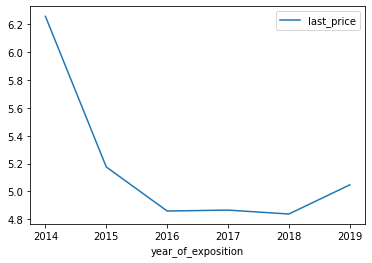

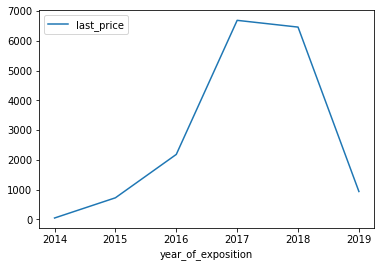

Последнее объявление 2019-05-01 00:00:00


In [69]:
(data
 .pivot_table(index='year_of_exposition', values='last_price')
 .plot()
)
plt.show()

(data
 .pivot_table(index='year_of_exposition', values='last_price', aggfunc='count')
 .plot()
)
plt.show()
print(f"Последнее объявление {data['first_day_exposition'].max()}")

В 2014 году средняя цена была довольно высокой из-за низкого предложения, однако к 2016-2017 годам количество предложений выросло и цена опустилась. За 2019 год показатели пока не полные и следует к концу года ожидать высокую среднюю цену за квартиры. Тендеция для цены за квартиру возрастающая.

Гипотезы:
- квартиру осенью, можно продать дороже, чем летом;
- возрастающая тендеция роста цен на квартиры год к году рекомендует подождать с продажей и спешить с покупкой;
- обычно у квартир с большим количеством комнат жилое пространство каждой комнаты меньше;
- квартиры на первом и последнем этажах менее ликвидны.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

Для начала опредлим 10 самых крупных населенных пунктов

In [70]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      10987
поселок Мурино         423
поселок Шушары         360
Всеволожск             303
Колпино                286
Пушкин                 264
Гатчина                256
поселок Парголово      246
деревня Кудрово        244
Выборг                 183
Name: locality_name, dtype: int64

In [71]:
big_locality_name = ['Санкт-Петербург',
                     'поселок Мурино',
                     'поселок Шушары',
                     'Всеволожск','Колпино',
                     'Пушкин',
                     'Гатчина',
                     'поселок Парголово',
                     'деревня Кудрово',
                     'Выборг']

big_data = data.query('locality_name in @big_locality_name')

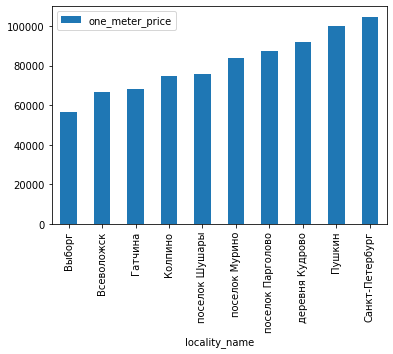

In [72]:
(big_data
 .pivot_table(index='locality_name', values='one_meter_price')
 .sort_values(by='one_meter_price')
 .plot.bar()
)
plt.show()

Из десяти крупнейших, самыми дорогими оказались `Санкт-Петербург` и `Пушкин`, а в `Выборге` самый дешевый квадратный метр, цена отличается почти в 2 раза.

#### Вычислим стоимость каждого километра до центра в Санкт-Петербурге
Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра.

Опишите, как стоимость объектов зависит от расстояния до центра города.

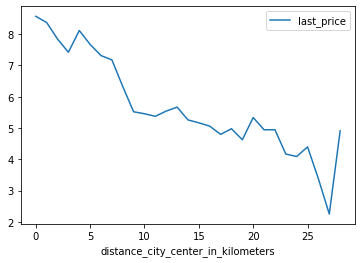

In [73]:
(data
 .query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='distance_city_center_in_kilometers', values='last_price')
 .plot()
)
plt.show()

График похож на гиперболу:

- ближайшие 10 километров до центра цена сильно меняется, а далее скорость падения цены замедляется.

- от 10 километров значения меняются менне значительно.

На окраине города видим выдивающиеся значения. Возможные причины их возникновения:
- концентрация дешевых районов на расстоянии 26 километров.

### Общий вывод

Ключевыми критериями стоимости квартиры является:

- количество общей площади (жилая площадь и площадь кухни имеют корреляцию от общей площади);
- чем меньше расстояние до центра, тем быстрее растёт цена;
- цены и спрос на квартиры самые маленькие летом, а осенью стабильно высокие;
- квартиры на первом и последнем этажах наименее ликвидны;
- чем типичнее квартира, тем быстрее ее можно продать (этаж не первый (коментарий по последнему этажу я давал в пункте изучения зависимости общей цены от типа этажа), комнат 1-2, цена за кв.м и т.п.)

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод